In [10]:
import pandas as pd
from sklearn import preprocessing

# Read the CSV file into a DataFrame
df = pd.read_csv('bank.csv')

In [15]:
# Create LabelEncoder instances for each categorical column and fit them
le_job = preprocessing.LabelEncoder().fit(df['job'])
le_marital = preprocessing.LabelEncoder().fit(df['marital'])
le_education = preprocessing.LabelEncoder().fit(df['education'])
le_contact = preprocessing.LabelEncoder().fit(df['contact'])
le_poutcome = preprocessing.LabelEncoder().fit(df['poutcome'])
le_yes_no = preprocessing.LabelEncoder().fit(['yes', 'no'])

# Transform categorical columns to numerical
df['job_num'] = le_job.transform(df['job'])
df['marital_num'] = le_marital.transform(df['marital'])
df['education_num'] = le_education.transform(df['education'])
df['contact_num'] = le_contact.transform(df['contact'])
df['poutcome_num'] = le_poutcome.transform(df['poutcome'])
df['housing_num'] = le_yes_no.transform(df['housing'])
df['loan_num'] = le_yes_no.transform(df['loan'])
df['subscribed_num']= le_yes_no.transform(df['subscribed'])

# Save the encoded DataFrame to a new CSV file
df.to_csv('bank_encoded.csv', index=False)

# Display the DataFrame
df.head()

,job,marital,education,housing,loan,contact,poutcome,subscribed,job_num,marital_num,education_num,contact_num,poutcome_num,housing_num,loan_num,subscribed_num
0,blue-collar,married,secondary,no,no,unknown,unknown,no,1,1,1,2,3,0,0,0
1,blue-collar,married,secondary,no,no,cellular,unknown,no,1,1,1,0,3,0,0,0
2,blue-collar,married,unknown,yes,no,unknown,unknown,no,1,1,3,2,3,1,0,0
3,self-employed,married,tertiary,no,no,cellular,unknown,no,6,1,2,0,3,0,0,0
4,technician,married,secondary,no,no,cellular,unknown,no,9,1,1,0,3,0,0,0


In [18]:
# Initialize label encoders for all categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = preprocessing.LabelEncoder().fit(df[column])

# Apply label encoding to all categorical columns
for column, encoder in label_encoders.items():
    df[column + '_num'] = encoder.transform(df[column])

# Drop the original categorical columns
df.drop(df.select_dtypes(include=['object']).columns, axis=1, inplace=True)

# Calculate Pearson correlation coefficients
dfcorrelations = df.corr(method='pearson')

# Print correlations with 'subscribed_num' column
print(dfcorrelations['subscribed_num'])

job_num           0.199343
marital_num       0.208831
education_num     0.111860
housing_num      -0.117185
loan_num         -0.141846
contact_num      -0.189402
poutcome_num     -0.258902
subscribed_num    1.000000
Name: subscribed_num, dtype: float64


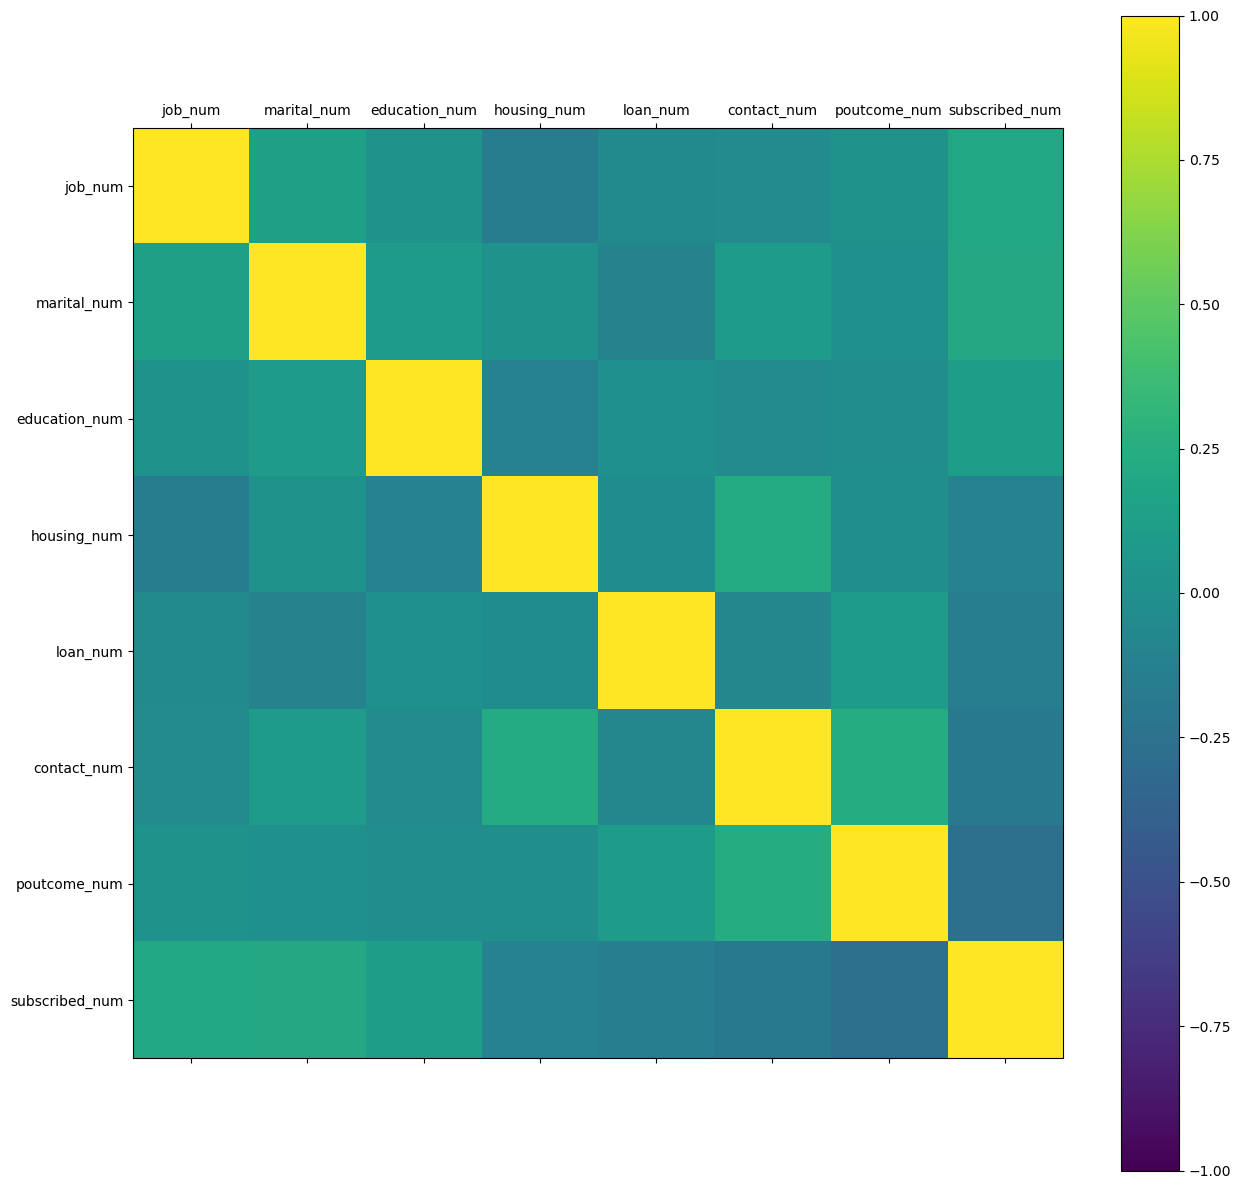

In [19]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(1,1,1)

cax = ax.matshow(dfcorrelations, vmin=-1, vmax=1)

fig.colorbar(cax)

ticks = [0,1,2,3,4,5,6,7]

ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num','subscribed_num'])
ax.set_yticklabels(['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num','subscribed_num'])
plt.show()

In [20]:
X = df[['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num']]

y = df['subscribed_num']

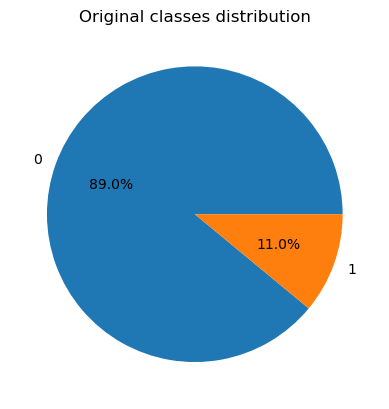

In [21]:
count_values = y.value_counts()

labels = count_values.index.to_list()

plt.title('Original classes distribution')

plt.pie(x = count_values, labels = labels, autopct ='%1.1f%%' )

plt.show()

Before resampling:  100
After resampling:  178


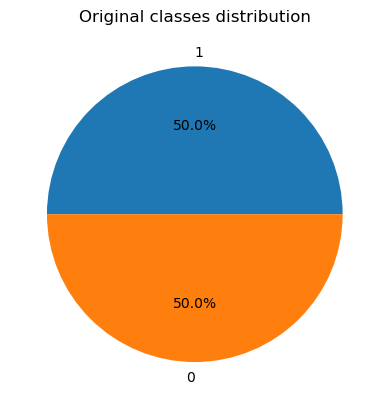

In [22]:
from sklearn.utils import resample

print("Before resampling: ", len(X))
 
df_0 = df[df['subscribed_num'] == 0]

df_1 = df[df['subscribed_num'] == 1]  

count_0 = df_0['subscribed_num'].count()

df_1_upsampled = resample(df_1, n_samples=count_0, replace=True)

df = pd.concat([df_1_upsampled,df_0])
 
X = df[['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num']]

y = df['subscribed_num']
print("After resampling: ", len(X))

count_values = y.value_counts()

labels = count_values.index.to_list()

plt.title('Original classes distribution')

plt.pie(x = count_values, labels = labels, autopct = '%1.1f%%' )

plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [26]:
# Categorical Bayes classifier
from sklearn.naive_bayes import CategoricalNB
model = CategoricalNB()
# Convenience
model.fit(X_train, y_train)
# Prediction on test data
y_pred=model.predict(X_test)
# Performance metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# the health
print('\nAccuracy: {:.2f}\n'.format(100*accuracy_score(y_test, y_pred)))
# Precision
print('\nPrecision: {:.2f}\n'.format(100*precision_score(y_test, y_pred)))
# Recall
print('\nRecall: {:.2f}\n'.format(100*recall_score(y_test, y_pred)))
# F1
print('\nF1: {:.2f}\n'.format(100*f1_score(y_test, y_pred)))


Accuracy: 80.00


Precision: 73.33


Recall: 95.65


F1: 83.02



[[14  8]
 [ 1 22]]


<Axes: >

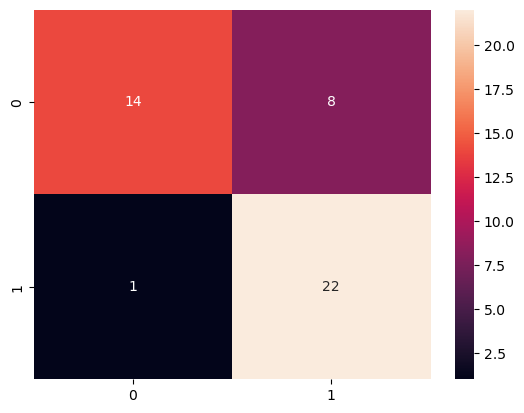

In [27]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

In [28]:
# New example
newExample = ['student','married','primary','no','yes','telephone','failure']
# Digital encoding
# Occupation
job=le_job.transform([newExample[0]])[0]
# Marital status
marital=le_marital.transform([newExample[1]])[0]
# Education degree
education=le_education.transform([newExample[2]])[0]
# Home loan
housing=le_yes_no.transform([newExample[3]])[0]
# Loan
loan=le_yes_no.transform([newExample[4]])[0]
# Contact method
contact=le_contact.transform([newExample[5]])[0]
# The result of the previous attempt
poutcome=le_poutcome.transform([newExample[6]])[0]

# Digital example
newExample_num=[[job,marital,education,housing,loan,contact,poutcome]]

day_info = pd.DataFrame(newExample_num, columns=['job_num','marital_num','education_num','housing_num','loan_num','contact_num','poutcome_num'])

# Category
predclass_num=model.predict(day_info)

# Reverse the conversion to get the categorical value
predclass=le_yes_no.inverse_transform(predclass_num)

print(predclass)

['yes']
